<a href="https://colab.research.google.com/github/Anagefilho/Anagefilho/blob/main/NQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fitness, anotando quanto as rainhas se colidem horizontalmente e verticalmente em cada indivíduo.

In [11]:
def fitnessScore(pop,new_pop):
    if pop.size > n: #Caso normal
      fit = np.zeros([pop[:,1].size, 1],dtype=int) #Criação da array do fit do tamanho da população, a matriz contém 1 coluna com pop.size linhas.
      colide_diagonal = 0
      colide_linha = 0

      for i in range(new_pop): #for para passar em toda população atual.
          colide_linha = len(pop[i]) - len(np.unique(pop[i])) # se existir números iguais na linha as rainhas estão se colidindo horizontalmente.

          x = pop[i]
          colide_diagonal = 0

          for k in range(len(x)): # k é criado para comparar a posição da peça atual com todas peças do tabuleiro.

            for j in range(len(x)): # j criado para ser comparado com k
                if j != k:
                  delta_x = abs(k - j) # diferença das colunas da peça atual k com as outras peças j
                  delta_y = abs(x[k] - x[j]) # diferença entre peça atual x[k] com as outras do tabuleiro x[j], diferença das linhas de cada rainha

                  if(delta_x == delta_y): # quando as diferenças entre as colunas (delta_x) e a diferença entre as linhas são iguais temos uma colisão diagonal. 
                    colide_diagonal += 1

            fit[i,0] = colide_linha + colide_diagonal

    if pop.size == n:  # Caso do indivíduo aleatório    
      fit = np.zeros(1)
      colide_linha = len(pop) - len(np.unique(pop)) # se existir números iguais na linha as rainhas estão se colidindo horizontalmente.
      x = pop
      colide_diagonal = 0
      for k in range(len(x)): # k é criado para comparar a posição da peça atual com todas peças do tabuleiro.

            for j in range(len(x)): # j criado para ser comparado com k
                if j != k:
                  delta_x = abs(k - j) # diferença das colunas da peça atual k com as outras peças j
                  delta_y = abs(x[k] - x[j]) # diferença entre peça atual x[k] com as outras do tabuleiro x[j], diferença das linhas de cada rainha

                  if(delta_x == delta_y): # quando as diferenças entre as colunas (delta_x) e a diferença entre as linhas são iguais temos uma colisão diagonal. 
                    colide_diagonal += 1
      return colide_diagonal+colide_linha

    return fit

#Crossover simples e de dois pontos

In [83]:
#Cruzamento 
def crossoverX(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = random.randint(0, n)

    p11 = pai1[0:x]
    p12 = pai1[x:n]
    p21 = pai2[0:x]
    p22 = pai2[x:n]
    
    filho1 = np.hstack([p11,p22])
    filho2 = np.hstack([p21,p12])
    
    filho1 = Mutacao(filho1) #Aplicando a mutação
    filho2 = Mutacao(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos

def crossoverVariosX(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = int(n/4)
    y = int(n/2)
    
    p11 = pai1[0:x]
    p1m = pai1[x:y]
    p1m2 = pai1[y:x+y]
    p12 = pai1[x+y:n]

    p21 = pai2[0:x]
    p2m = pai2[x:y]
    p2m2 = pai2[y:x+y]
    p22 = pai2[x+y:n]

    filho1 = np.concatenate([p11,p2m,p2m2,p12])
    filho2 = np.concatenate([p21,p1m,p1m2,p22])
    
    filho1 = MutacaoDupla(filho1) #Aplicando a mutação 
    filho2 = MutacaoDupla(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos


# Mutações, e dupla mutação

In [82]:
#Mutações
def Mutacao(child, Mutacao_prob=.20): #probabilidade de mutação de 80% para dar mais diversividade ao modelo mas sem mutação dupla
      p = random.random()
      if(p > Mutacao_prob):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        return child       

      else:
        return child

def MutacaoDupla(child, Mutacao_prob=.20): #probabilidade de mutação de 80% para dar mais diversividade ao modelo, e tem a chance de ocorrer mutação dupla.
      p = random.random()
      if(p > Mutacao_prob):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        
        if (p > 0.7): #Mutação dupla, 0.2% de chance
          temp2 = child[ind[2]]
          child[ind[2]] = child[ind[3]]
          child[ind[3]] = temp2
          
      return child       



#Seleção dos melhores pais da população e função de imprimir tabuleiro

In [98]:
#Avaliação, checa fitness
def selecao_ranking(pop, new_pop):
    pop = pop[pop[:,n].argsort()][0:new_pop, :] #retorna uma lista com a população ordenada pelo fitting score
    return pop[0],pop[1] #pegamos os 2 melhores pais da população atual.

def selecao_aleatoria(pop, new_pop):
    pai_aleatorio = random.randint(0, new_pop/2)
    pai_aleatorio2 = random.randint(0, new_pop/2)
    return pop[pai_aleatorio],pop[pai_aleatorio2] # 2 pais aleatórios da metade da população. 

def tabuleiro(pop, n): # Desenha o tabuleiro
    tabuleiro = np.zeros((n,n,3))
    tabuleiro += 0.5 # Inicializa o tabuleiro com cor preta em todas as casas da matriz
    tabuleiro[::2, ::2] = 1 # Cor branca
    tabuleiro[1::2, 1::2] = 1 # Cor branca restantes

    positions = pop[0,:n] # A melhor população

    fig, ax = plt.subplots()
    ax.imshow(tabuleiro, interpolation='nearest')

    for y, x in enumerate(positions):
        ax.text(x, y, u'\u2655', size=15, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')
    
    plt.show()

#Inicialização e looping (Exemplo com gerações)

# Alterações possíveis no código
1.   Escolher tipo de seleção: selecao_aleatoria, selecao_ranking
2.   Crossover: crossover_multi_x / crossover_um_x
3.   Mutação: Mutacao / MutacaoDupla



# Início do G.A

A saída de streaming foi truncada nas últimas 5000 linhas.
Geração:  8752 
Melhor indivíduo:  [ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1] Nº de conflitos:  1
[ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1] [ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1]
Ind. aleatório:  [ 9  8 10 13 11 12  2  3  7 14  4  6  1  0  5 16]
Geração:  8753 
Melhor indivíduo:  [ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1] Nº de conflitos:  1
[ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1] [ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1]
Ind. aleatório:  [ 3 10  5  1 13 12 11  0  2 14  7  8  9  6  4 30]
Geração:  8754 
Melhor indivíduo:  [ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1] Nº de conflitos:  1
[ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1] [ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1]
Ind. aleatório:  [14 12  5  6  1 11  9  7 10  4  3  8  2 13  0 28]
Geração:  8755 
Melhor indivíduo:  [ 8 10  2  4 11  7  0 12  6  1 14  2  9  3 13  1] Nº de conflitos:  1
[ 8 10  2  4 11  7  

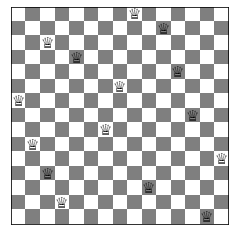

In [101]:
import sys
import random
import numpy as np 
import matplotlib.pyplot as plt

#Roteiro para criação do algoritmo genético

#Representação
#Inicialização
#Avaliação
#Loop
#Seleção
#Cruzamento
#Mutação
#Avaliação
#Reinserção

#Representação por exemplo: 8 rainhas, [1 4 3 6 2 7 5 0]

# Nesse caso a fitness = número de rainhas se conflitando.  
""" 
    k = 0, j = 2
    0 - 2 = 2 
    x[k] - x[j]
    1 - 3 = 2
    colide diagonal += 1

    k = 1, j = 2
    1 - 2 = 1
    x[k] - x[j]
    4 - 3 = 1
    colide diagonal += 1

    k = 1, j = 3 
    1 - 3 = 2
    x[k] = 4, x[j] = 6
    4 - 6 = 2
    colide diagonal += 1

    fitness score = 3 nesse indivíduo.

   0 1 2 3 4 5 6 7 
0 [0 0 0 0 0 0 0 X ] 
1 [X 0 0 0 0 0 0 0 ]
2 [0 0 0 0 X 0 0 0 ]
3 [0 0 X 0 0 0 0 0 ]
4 [0 X 0 0 0 0 0 0 ]
5 [0 0 0 0 0 0 X 0 ]
6 [0 0 0 X 0 0 0 0 ]
7 [0 0 0 0 0 X 0 0 ]
"""
#Inicialização
#n = int(input("Digite o número de rainhas: "))
#new_pop = int(input("Número da população: "))
n = 15
new_pop = 200
generation = 0

pop = np.zeros([new_pop,n],dtype=int)
IndAleatorio = np.zeros(n)

for i in range(new_pop):
    pop[i, :] = np.random.permutation(n) #Inicialização da população com permutações dos númeoros de 0 até n.

  
fit = fitnessScore(pop,new_pop) # calcula de todos da população atual

pop = np.hstack([pop,fit]) # adiciona na ultima linha os valores de fitness de cada indivíduo da população.

pop = pop[pop[:,n].argsort()][0:new_pop, :] # Retorna a população ordenada pelo fitting 

print(pop[pop[:,n].argsort()][0:new_pop, :], "aaa",pop[0:new_pop,:])

#Loop
while(pop[0][n] != 0):
    generation+=1
    print("Geração: ", generation, "\nMelhor indivíduo: ", pop[0], "Nº de conflitos: ", pop[0,n])
    
    if(generation > 500): # Tentativa de recomeço aleatório, adiciona um indivíduo aleatório no final para fugir de ótimo local.
       IndAleatorio = np.random.permutation(n)
       fit = fitnessScore(IndAleatorio, 1)
       IndAleatorio = np.hstack([IndAleatorio,fit])
       pop[-1] = IndAleatorio # Reinserção 

    pai1, pai2 = selecao_aleatoria(pop, new_pop) #Seleção dos pais, selecao_ranking ou selecao_aleatoria pode ser utilizado
    print(pai1, pai2)
    filhos = crossoverX(pai1, pai2) # Crossover, crossover_um_x ou crossover_varios_x pode ser utilizado, mudar função de mutação dentro dele.
    fit_filhos = fitnessScore(filhos,2)

    filhos = np.hstack([filhos,fit_filhos])
    print("Ind. aleatório: ", pop[-1])
    pop = np.vstack([pop,filhos]) # Reinserção

    pop = pop[pop[:,n].argsort()][0:new_pop, :] # Atualiza pop pegando os melhores individuos

    if generation > 9999:
      break

print("Número de rainhas: ", n)
print("Número de gerações: ", generation)
print("Melhor solução: ", pop[0, 0:n])
print("Número de conflitos: ", pop[0][n])
tabuleiro(pop, n) #figura

#Seleção

#Avaliação

#Reinserção

